<a href="https://colab.research.google.com/github/sush0677/Assigment/blob/main/CVAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Preparation***

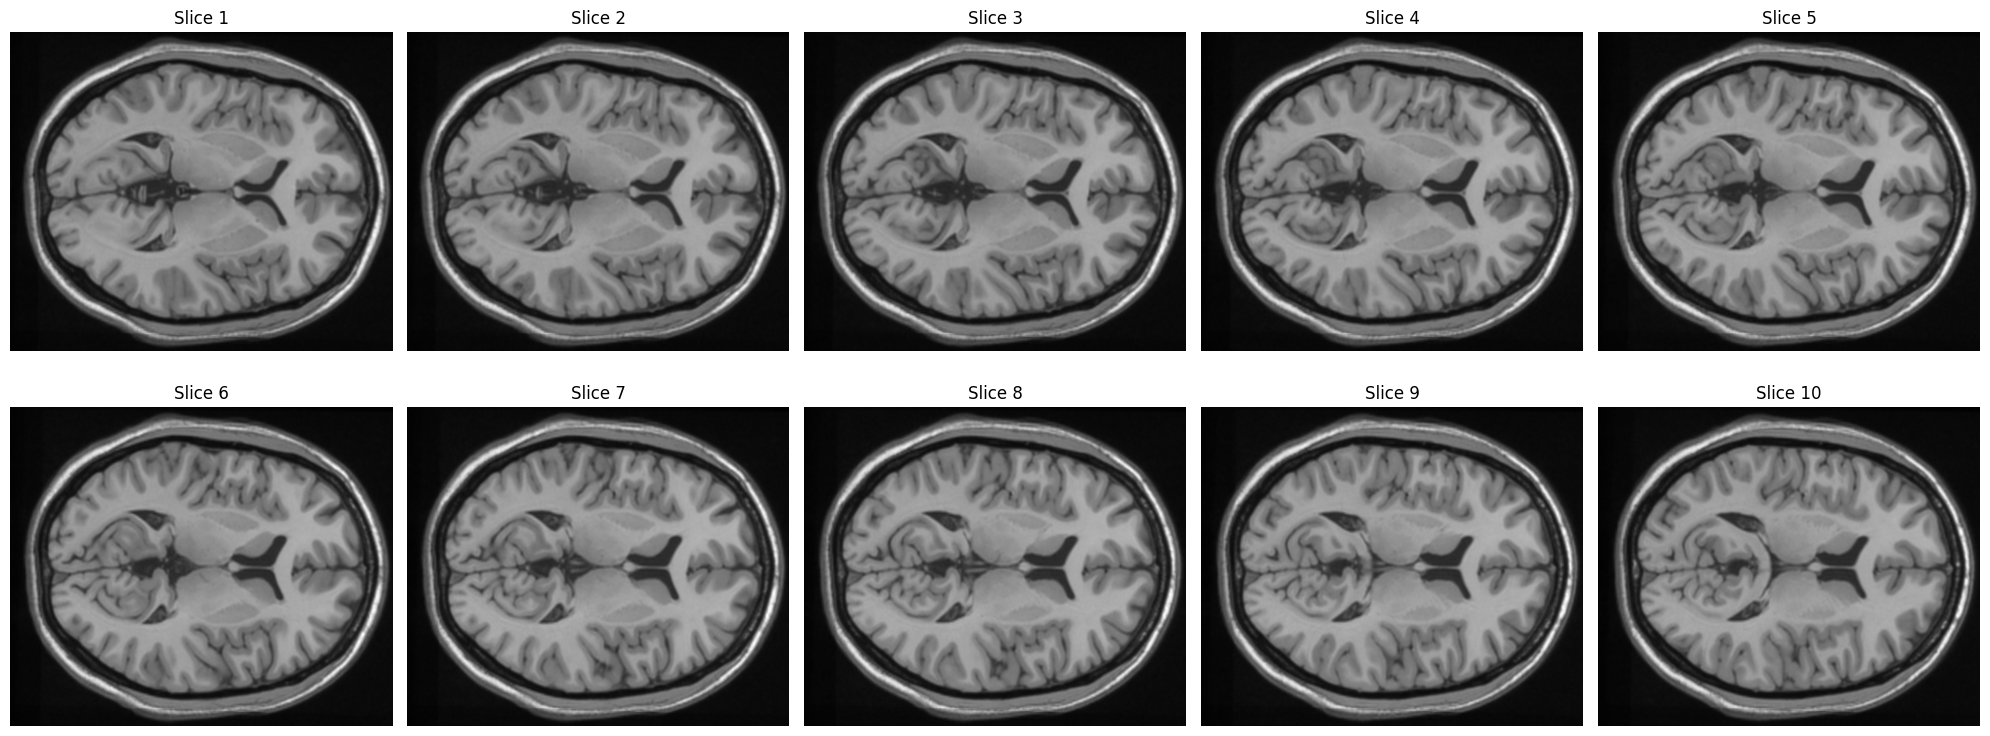

In [14]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat = loadmat('Brain.mat')

# Assume 'T1' contains the MRI data
T1 = mat['T1'].astype(np.float32)

# Normalize the data to the range [0, 1]
T1_normalized = (T1 - np.min(T1)) / (np.max(T1) - np.min(T1))

# Plot all the slices in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):  # Assuming there are 10 slices
    ax = axes[i // 5, i % 5]
    ax.imshow(T1_normalized[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Slice {i+1}')
plt.tight_layout()
plt.show()


# ***K-Means Clustering***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


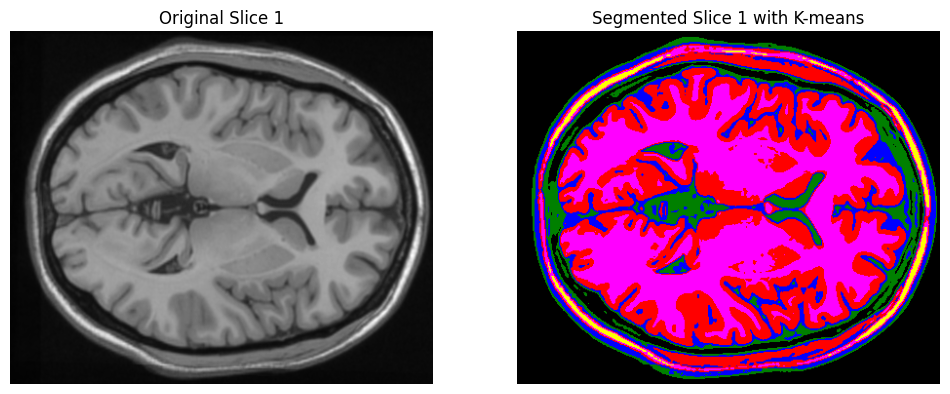

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


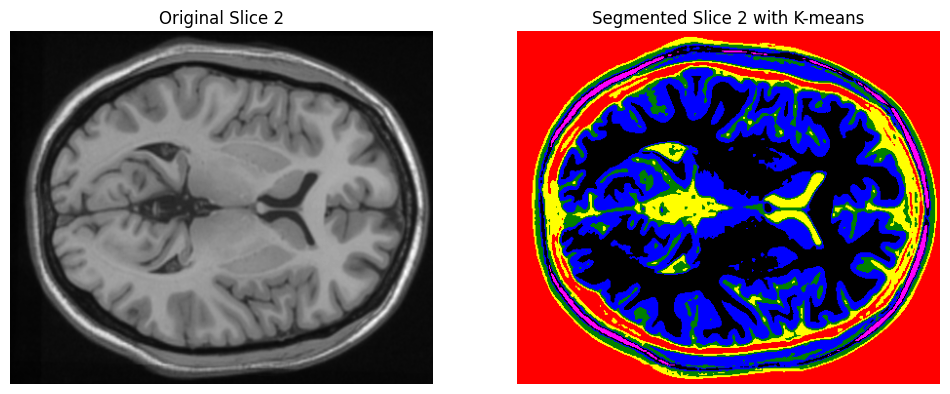

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


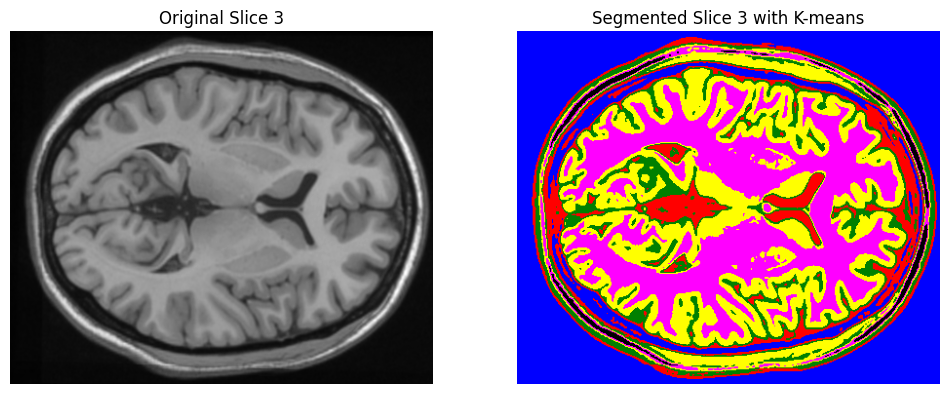

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


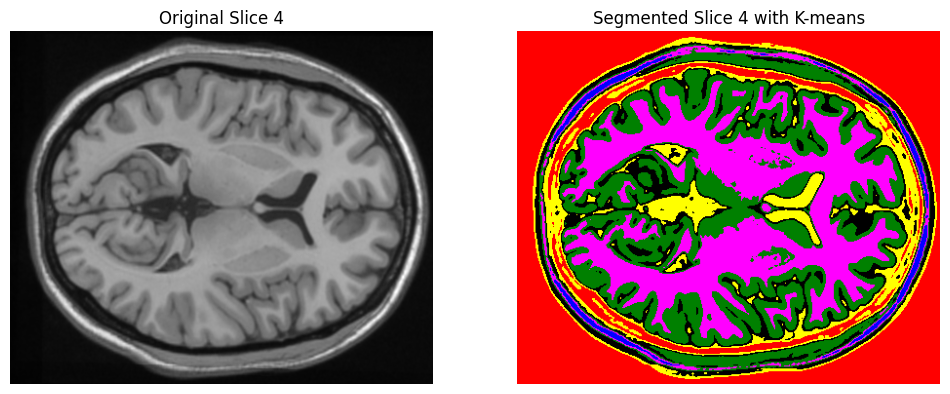

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


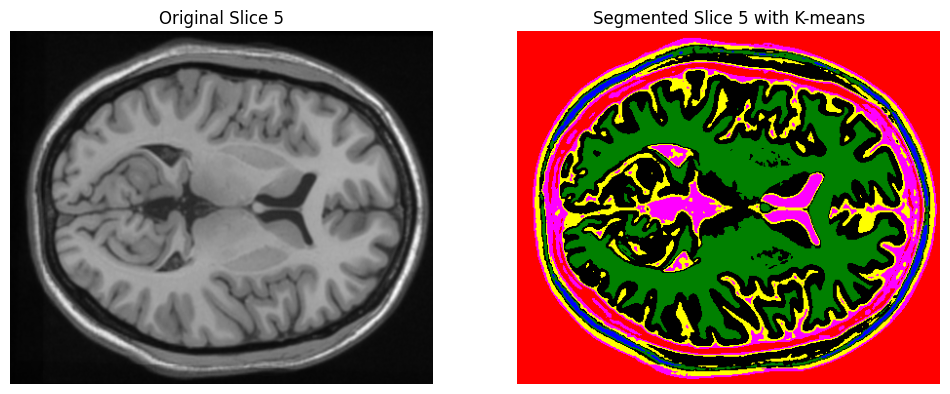

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


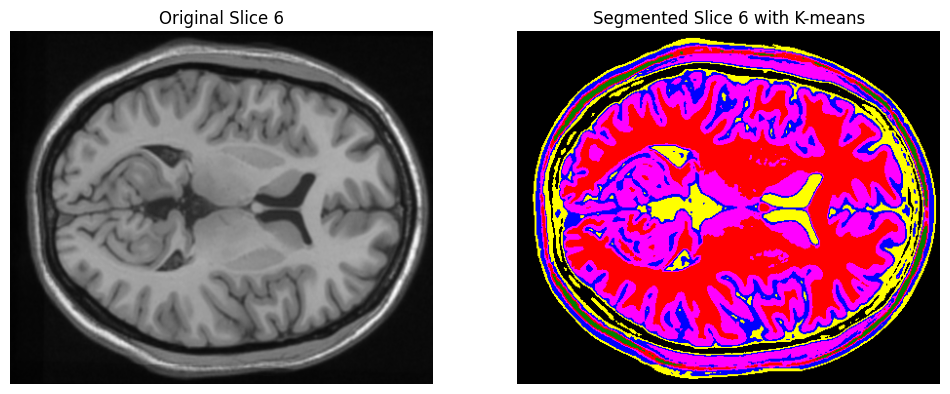

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


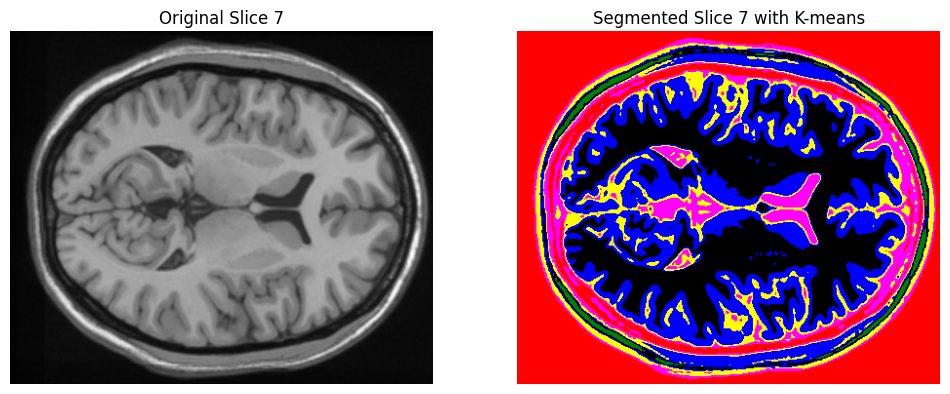

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


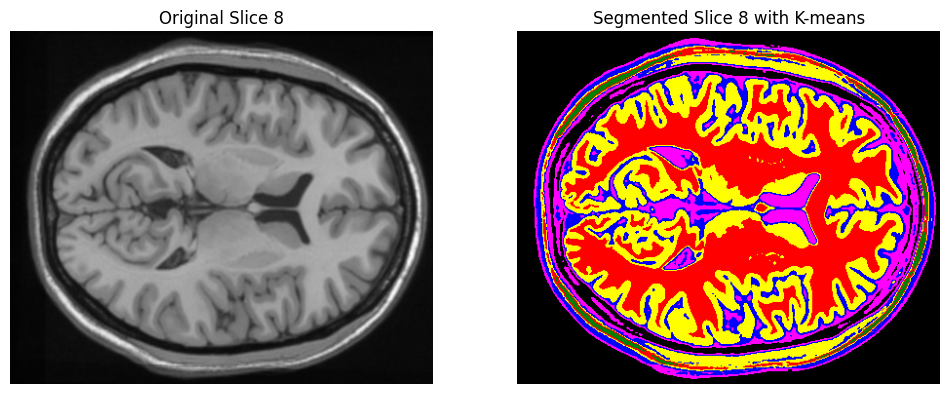

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


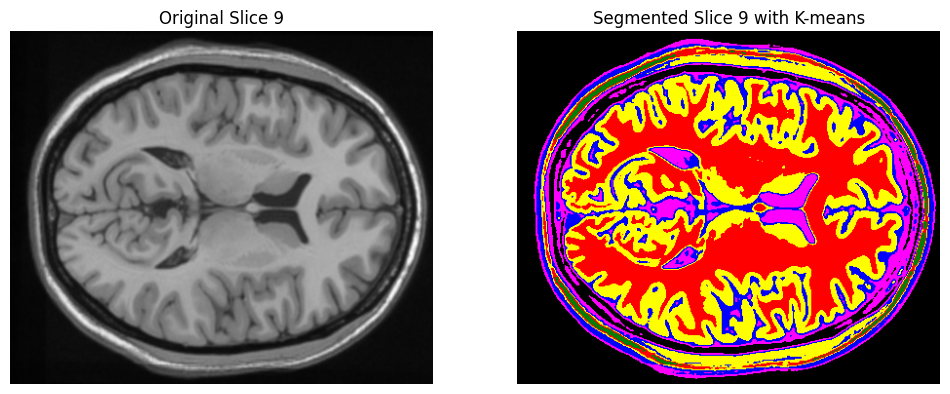

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


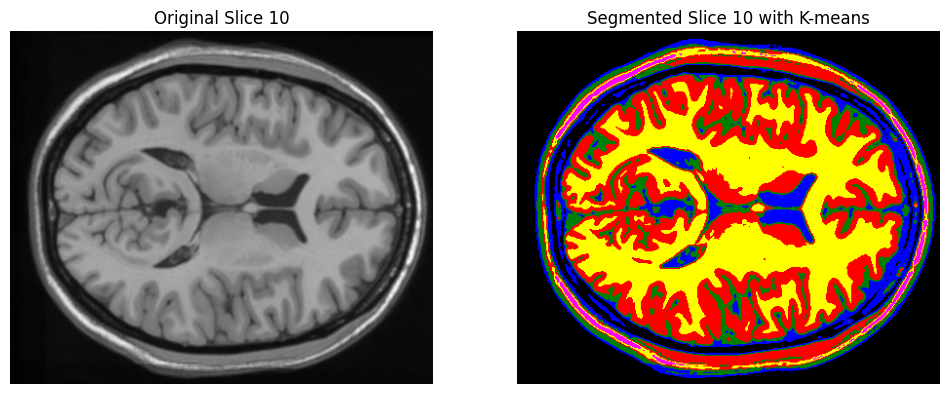

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.color import label2rgb

# Assume 'T1' is your MRI image data loaded as a 3D NumPy array
# (e.g., using numpy.load if your data is in .npy format)

# Define a function to perform K-means segmentation
def segment_slice_with_kmeans(slice_image, n_clusters=6):
    # Reshape the image for K-means
    image_reshaped = slice_image.reshape((-1, 1))

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_reshaped)
    segmented = kmeans.labels_.reshape(slice_image.shape)

    # Optionally convert segmented image to RGB for visualization
    segmented_rgb = label2rgb(segmented, bg_label=0)
    return segmented_rgb

# Iterate over the slices and segment each using K-means
for i in range(0, 10):  # range(0, 10) generates numbers from 0 to 9
    slice_image = T1[:, :, i]
    segmented_image = segment_slice_with_kmeans(slice_image)

    # Display the original and segmented images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(slice_image, cmap='gray')
    plt.title(f'Original Slice {i+1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='jet')
    plt.title(f'Segmented Slice {i+1} with K-means')
    plt.axis('off')

    plt.show()


# ***Watershed***

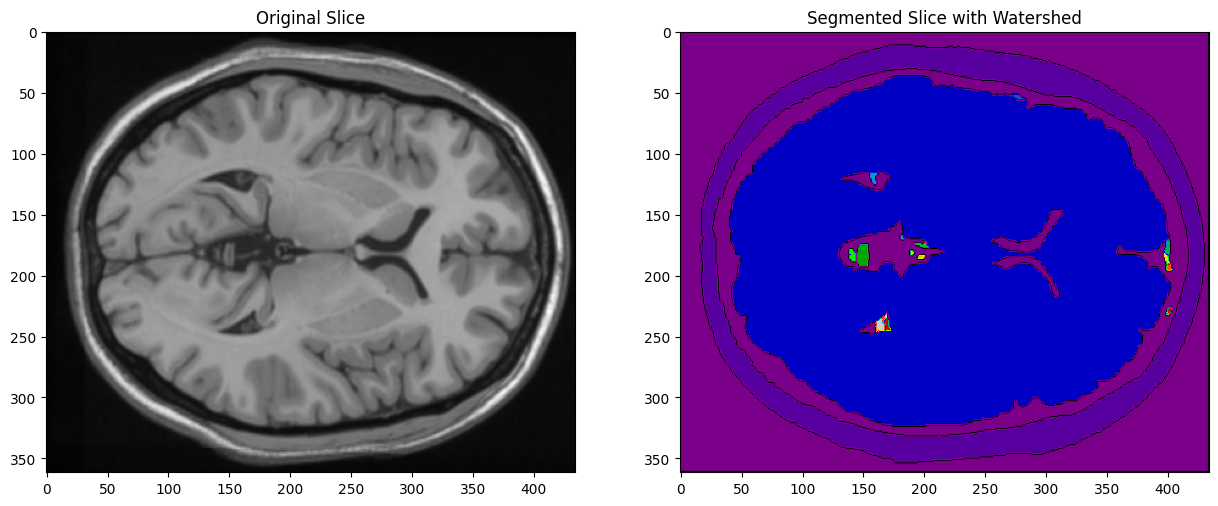

In [ ]:
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']  # MRI images

# Choose a slice to work with
slice_index = 0  # Example: first slice
slice_image = T1[:, :, slice_index].astype(np.float32)  # Ensure the image is a floating-point type

# Normalize the image to the range [0, 255]
slice_image = cv2.normalize(slice_image, None, 0, 255, cv2.NORM_MINMAX)

# Convert the image to 8-bit
slice_image_8u = np.uint8(slice_image)

# Preprocessing: Apply a Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(slice_image_8u, (5, 5), 0)

# Find sure foreground area by applying a threshold
ret, sure_fg = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find sure background area
sure_bg = cv2.dilate(sure_fg, None, iterations=3)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Convert markers to the correct type
markers32 = np.int32(markers)

# Apply the watershed algorithm
cv2.watershed(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB), markers32)

# Generate the segmentation result
segmented = markers32.copy()
segmented[segmented == -1] = 0
segmented = np.uint8(segmented)

# Display the results
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(slice_image, cmap='gray')
plt.title('Original Slice')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='nipy_spectral')
plt.title('Segmented Slice with Watershed')
plt.show()
